In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
#Import data for processing

filename = "./18-08-2020/FLPID_circle1.xlsx"
data = pd.read_excel(filename, 
                    names = ["globaltime","dt",'rb1x','rb1y','rb1z','rb2x','rb2y','rb2z',
                            'rb3x','rb3y','rb3z','rb4x','rb4y','rb4z','rb5x','rb5y','rb5z',
                            'rb6x','rb6y','rb6z','rb7x','rb7y','rb7z','rb8x','rb8y','rb8z',
                            'xd','yd','thetad'])
while data.iloc[0]['rb1z']==0.0:    
    data = data.drop(0)
    data.index-=1
      
data.iloc[0]['rb1z']        
data


,globaltime,dt,rb1x,rb1y,rb1z,rb2x,rb2y,rb2z,rb3x,rb3y,...,rb6z,rb7x,rb7y,rb7z,rb8x,rb8y,rb8z,xd,yd,thetad
0,0.026660,0.02,621.184767,714.143838,99.130894,522.220352,769.262860,98.760671,192.015810,956.096981,...,87.226218,524.752391,535.531906,94.545612,619.968669,591.291578,96.174127,0.008375,0.999965,0
1,0.046673,0.02,621.139371,714.226238,99.029451,522.191734,769.196941,98.794448,192.018369,956.082164,...,87.267195,524.713541,535.515140,94.571551,620.019060,591.545840,95.996708,0.014662,0.999893,0
2,0.072570,0.02,621.166188,714.191011,99.043422,522.196021,769.245315,98.719027,192.188837,956.530699,...,87.276137,524.761140,535.512959,94.541355,620.060140,591.544541,95.967366,0.022797,0.999740,0
3,0.107842,0.02,621.180733,714.215505,99.086401,522.224465,769.237551,98.763051,192.053271,956.067712,...,87.255801,524.741110,535.508700,94.558860,620.064807,591.519283,95.983571,0.033873,0.999426,0
4,0.126793,0.02,621.149014,714.146378,99.064629,522.177409,769.251904,98.716074,192.153056,956.531002,...,87.190134,524.717630,535.532985,94.534203,620.031438,591.538255,95.936465,0.039823,0.999207,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,21.251799,0.02,201.884817,1077.784113,104.560377,102.556115,1132.134038,103.844302,-229.216496,1316.125767,...,97.018691,106.897636,898.234946,101.626246,201.890475,954.810975,102.243006,0.383206,0.923663,0
1044,21.269398,0.02,204.298872,1080.339776,104.857967,104.997058,1134.826651,104.102202,-226.744551,1318.720787,...,97.025770,109.125196,900.565596,102.030569,204.235839,957.434831,102.446600,0.388306,0.921530,0
1045,21.286394,0.02,206.735061,1082.968851,104.906841,107.505969,1137.410683,104.273067,-224.331585,1321.430392,...,97.098677,111.571436,903.265336,102.106935,206.714936,959.967344,102.665716,0.393221,0.919444,0
1046,21.310957,0.02,209.231809,1085.556519,105.219803,109.867020,1140.025997,104.518457,-221.800315,1324.154545,...,97.333852,113.955101,905.750156,102.508200,209.132062,962.572460,102.941233,0.400305,0.916382,0


In [57]:
#calculate robot position at each point

#calculate the center of the robot
Adet = (data['rb1x']*(data['rb4y']-data['rb6y']) -
       data['rb1y']*(data['rb4x']-data['rb6x']) +
       data['rb4x']*data['rb6y']-data['rb6x']*data['rb4y'])

Bdet = ((data['rb1x']**2+data['rb1y']**2)*(data['rb6y']-data['rb4y'])  +
       (data['rb4x']**2+data['rb4y']**2)*(data['rb1y']-data['rb6y'])  +
       (data['rb6x']**2+data['rb6y']**2)*(data['rb4y']-data['rb1y']) )

Cdet = ((data['rb1x']**2+data['rb1y']**2)*(data['rb4x']-data['rb6x'])  +
       (data['rb4x']**2+data['rb4y']**2)*(data['rb6x']-data['rb1x'])  +
       (data['rb6x']**2+data['rb6y']**2)*(data['rb1x']-data['rb4x']) )

x_r = -Bdet/(2.*Adet)/1000. #robot global position x in meters 
y_r = -Cdet/(2.*Adet)/1000. #robot global position y in meters


x_mid = (data['rb1x']+data['rb8x'])/2. #calculate the midpoint of wheel 1
y_mid = (data['rb1y']+data['rb8y'])/2.

#rotate desired position to be in line with robot
xd_rot = data['xd']*np.cos(np.arctan2(y_mid[0]-y_r[0],x_mid[0]-x_r[0]))-data['yd']*np.sin(np.arctan2(y_mid[0]-y_r[0],x_mid[0]-x_r[0]))
yd_rot = data['yd']*np.cos(np.arctan2(y_mid[0]-y_r[0],x_mid[0]-x_r[0]))+data['xd']*np.sin(np.arctan2(y_mid[0]-y_r[0],x_mid[0]-x_r[0]))

#set robot initial position to the origin
x_r = x_r+Bdet[0]/(2.*Adet[0])/1000. #robot position x in meters starting at origin
y_r = y_r+Cdet[0]/(2.*Adet[0])/1000. #robot global position y in meters  starting at origin
theta_r = np.arctan2(y_mid-y_r,x_mid-x_r) - np.arctan2(y_mid[0]-y_r[0],x_mid[0]-x_r[0]) #robot angle starting at 0

In [58]:
#cast robot info into a new dataframe

pdata = pd.DataFrame()
pdata.insert(0,"globaltime", data['globaltime'],True)
pdata.insert(1, "x_r", x_r,True)
pdata.insert(2, "y_r", y_r,True)
pdata.insert(3, "theta_r", theta_r,True)
pdata.insert(4, "x_d", xd_rot,True)
pdata.insert(5, "y_d", yd_rot,True)
pdata.insert(6, "theta_d", data['thetad'],True)
pdata


,globaltime,x_r,y_r,theta_r,x_d,y_d,theta_d
0,0.026660,0.000000,0.000000,0.000000,-0.718751,0.695268,0
1,0.046673,-0.000027,-0.000019,0.000127,-0.714365,0.699773,0
2,0.072570,-0.000015,-0.000040,0.000085,-0.708648,0.705562,0
3,0.107842,-0.000009,-0.000019,0.000077,-0.700787,0.713371,0
4,0.126793,-0.000035,-0.000031,0.000084,-0.696527,0.717531,0
...,...,...,...,...,...,...,...
1043,21.251799,-0.418778,0.360819,0.563599,-0.405124,0.914262,0
1044,21.269398,-0.416380,0.363565,0.561842,-0.400063,0.916487,0
1045,21.286394,-0.413946,0.366219,0.560019,-0.395164,0.918611,0
1046,21.310957,-0.411485,0.368771,0.558210,-0.388064,0.921633,0


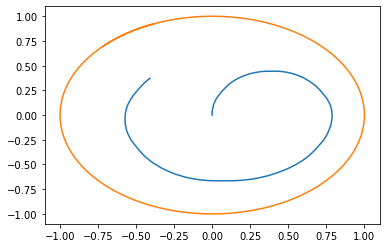

In [59]:
plt.plot(pdata['x_r'],pdata['y_r'],pdata['x_d'],pdata['y_d'])
plt.show()